In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input,SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

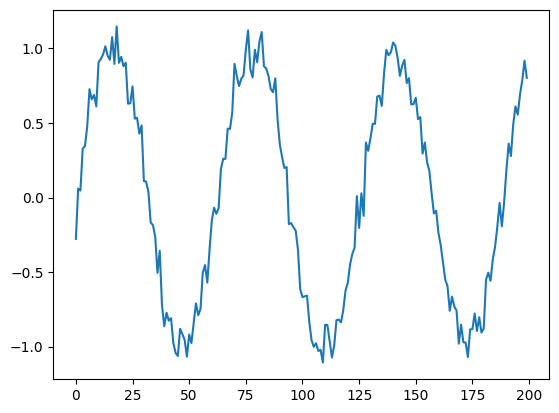

In [24]:
series=np.sin(0.1*np.arange(200)) +np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [25]:
#making the data
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
X=np.array(X).reshape(-1,T,1)# makes the data NxTxD
Y=np.array(Y)
N=len(X)
print("X.shape:",X.shape,"Y.shape",Y.shape)

X.shape: (190, 10, 1) Y.shape (190,)


In [38]:
#RNN
i=Input(shape=(T,1))
x=SimpleRNN(5, activation='relu')(i)
x=Dense(1)(x)
model=Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

r=model.fit(
    X[:N//2], Y[:N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

Epoch 1/80


c:\Users\DELL\.conda\envs\tfGpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 92ms/step - loss: 1.4276 - val_loss: 0.9286
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 0.5123 - val_loss: 0.3251
Epoch 3/80
3/3 [==============================] - 0s 24ms/step - loss: 0.2572 - val_loss: 0.2455
Epoch 4/80
3/3 [==============================] - 0s 26ms/step - loss: 0.1661 - val_loss: 0.1671
Epoch 5/80
3/3 [==============================] - 0s 23ms/step - loss: 0.1275 - val_loss: 0.1393
Epoch 6/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1195 - val_loss: 0.1177
Epoch 7/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0945 - val_loss: 0.1269
Epoch 8/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1062 - val_loss: 0.1303
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1015 - val_loss: 0.1112
Epoch 10/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0955 - val_loss: 0.0992
Epoch 11/80
3/3 [=======================

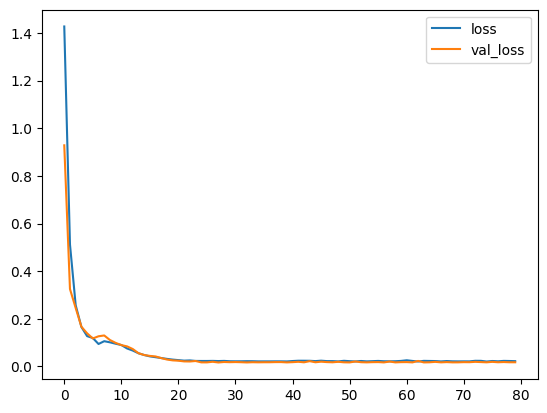

In [39]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [40]:
#now 1 step forecast (wrong)
validation_target=Y[-N//2:]
validation_predictions=[]
i=-N//2
while len(validation_predictions)<len(validation_target):
    p=model.predict(X[i].reshape(1,-1,1))[0,0]
    i+=1
    validation_predictions.append(p)


1/1 [==============================] - 0s 16ms/step


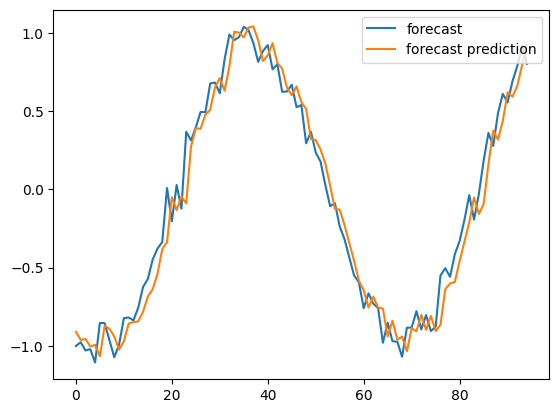

In [41]:
plt.plot(validation_target,label='forecast')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()

In [42]:
# Validation set target values (second half of Y)
validation_target = Y[-N//2:]
validation_predictions = []

# Last known input sequence (last sample in the second half of X)
last_x = X[-N//2]

# Loop to predict future values based on the model's own predictions
while len(validation_predictions) < len(validation_target):
    # Predict the next value
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
    
    # Append the prediction to the validation predictions
    validation_predictions.append(p)
    
    # Update the input sequence for the next prediction
    last_x = np.roll(last_x, -1)  # Shift values to the left
    last_x[-1] = p  # Set the last value to the predicted value

1/1 [==============================] - 0s 17ms/step


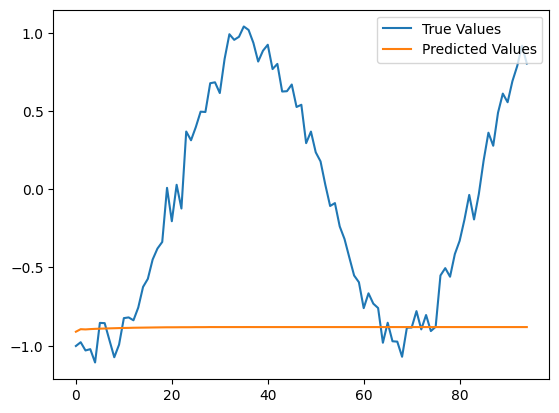

In [43]:
plt.plot(validation_target, label='True Values')
plt.plot(validation_predictions, label='Predicted Values')
plt.legend()
plt.show()

 so we see that rnn with the default parameters dont perform as well as the linear regression.
 here the straight line is there coz rnn is simply taking the prev value and predictin as the next